# Developing Gradient Descent (GD) Algorithm for Linear Regression
_Implementing Gradient Descent optimization algorithm to build a Linear Regression model._

In [1]:
# Imports required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data Set
_The dataset being used here contains the examples of advertisement spends across multiple channels such as Radio, TV, and Newspaper, and the corresponding sales revenue generated at different time periods. In this regression task, a regression model was built for predicting future sales using spends on different advertisement channels._

In [2]:
# Loads the data set
sales = pd.read_csv("../../Data/Advertising.csv")

In [3]:
# Views the few of rows from the data set
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Prints information about the data set
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


## Preparing Data Set

In [5]:
# Seperates features and target

X = sales[["TV", "Radio", "Newspaper"]]
y = sales["Sales"]

In [6]:
# Standardizes features
X = X.apply(lambda x: (x - X.mean()) / X.std(), axis = 1)

In [7]:
# Checks how the standardized features look like
display(X.head())

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593


In [8]:
# Creates additional feature values for x0 for each instance
# This makes the number of features equal to the number of parameters that include bias
X_new = np.c_[np.ones((X.shape[0], 1)), X]

# Checks how the new features look like
display(X_new[:10])

array([[ 1.        ,  0.9674246 ,  0.97906559,  1.77449253],
       [ 1.        , -1.19437904,  1.0800974 ,  0.66790272],
       [ 1.        , -1.51235985,  1.52463736,  1.77908419],
       [ 1.        ,  0.05191939,  1.21480648,  1.28318502],
       [ 1.        ,  0.39319551, -0.83950698,  1.27859336],
       [ 1.        , -1.61136487,  1.72670098,  2.04080875],
       [ 1.        , -1.0429596 ,  0.64229289, -0.32389562],
       [ 1.        , -0.31265202, -0.24678703, -0.87030304],
       [ 1.        , -1.61252963, -1.42549148, -1.3570189 ],
       [ 1.        ,  0.61450084, -1.39181421, -0.42950378]])

In [9]:
# Converts target from Series to ndarray to match the shape requirement 
# for matrix multiplication during gradient descent
y = np.expand_dims(y, axis=1)

# Checks how the target look like after reshape
display(y[:10])

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6]])

## Optimization

In [10]:
def mean_squared_error(y_true, y_pred):
    """
    Mean squared error regression loss.

    Parameters
    -----------
    y_true: array-like of shape (n_samples,)
        Ground truth (correct) target values.
        
    y_pred: array-like of shape (n_samples,)
        Estimated target values.

    Returns
    --------
    loss: float or ndarray of floats
        A non-negative floating point value (the best value is 0.0), or 
        an array of floating point values, one for each individual target.
    """
    
    residuals = y_true - y_pred
    
    squared_error = np.sum(np.square(residuals))
    
    mse = squared_error / len(residuals)
    
    return mse

In [11]:
def batch_gradient_descent(X, y, iterations, alpha = 0.01):
    """
    Model parameters gets adjusted based on the gradient of the cost function 
    over iterations.
    
    Parameters
    -----------
        X: ndarray
            Features of observations
        y: ndarray
            Actual target
        iterations: int
            Number of iterations for algorithm to continue to optimize paramters
        alpha: float
            Learning rate that decides the magnitude of the update to 
            be done to the parameters.
    
    Returns
    --------
        out: (DataFrame, ndarray)
            cost: DataFrame
                List of iterations against cost
            parameters: ndarray
                Updated parameters at the end of specified number of iterations
    """    
    
    m = X.shape[0]  # No. of observations
    n = X.shape[1]  # No. features
    
    # Initializes model parameters randomly (standard normal distribution)
    theta = np.random.randn(n, 1)
    
    # Maintains the cost against each iteration
    cost = pd.DataFrame(columns=["iteration", "cost"])
    
    # Performs parameters adjustment over iterations
    for i in range(iterations):
        # Calculates the gradients
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        
        # Adjusts the parameters
        theta = theta - alpha * gradients
        
        # Performs predictions against the adjusted parameters
        predictions = X.dot(theta)
        
        # Calculates prediction error
        mse = mean_squared_error(y, predictions)
        
        # Saves prediction error against iteration
        cost.loc[i] = [i, mse]
        
    # Returns list of costs and final parameters
    return cost, theta

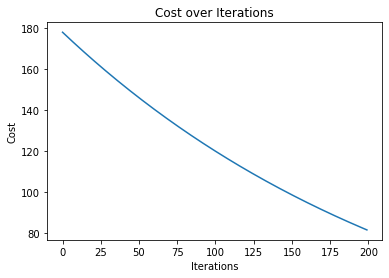

In [12]:
# Runs the gradient descent for 200 iterations with 0.001 as learning rate
# and plots the cost against iterations

cost, theta_200 = batch_gradient_descent(X_new, y, 200, alpha = 0.001)

plt.plot(cost.iteration, cost.cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost over Iterations")
plt.draw()

As it was noticed that cost was still redcuing and has not reached the minimum point, iterations can be increased and verified if the cost is further reaching to a minimum.

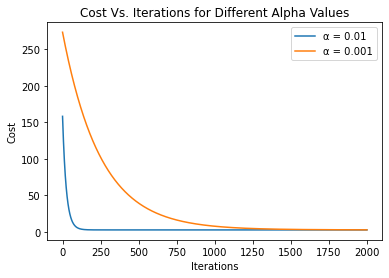

In [13]:
# Runs the gradient descent for 2000 iterations with learning rate (lr) 0.01 and
# then with 0.001, and plots the converagence performance against both lr

cost_01, theta_2000_01 = batch_gradient_descent(X_new, y, 2000, alpha = 0.01)

cost_001, theta_2000_001 = batch_gradient_descent(X_new, y, 2000, alpha = 0.001)

plt.plot(cost_01.iteration, cost_01.cost, label="α = 0.01")
plt.plot(cost_001.iteration, cost_001.cost, label="α = 0.001")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.title("Cost Vs. Iterations for Different Alpha Values")
plt.draw()

The plot above shows that the learning is faster for alpha value **0.01** compared to **0.001**. For smaller values, the learning could be slower whereas higher learning rate could lead to skipping the minima of cost function. It is imperative to search for the optimal learning parameter.

In [14]:
# Prints the final cost and parameters against both the learning rate over same iterations

print("Parameters against α = 0.01:\n", theta_2000_01, "\n")

print("Parameters against α = 0.001:\n", theta_2000_001, "\n")

Parameters against α = 0.01:
 [[14.0225    ]
 [ 3.92908869]
 [ 2.79906919]
 [-0.02259517]] 

Parameters against α = 0.001:
 [[13.73085764]
 [ 3.8650554 ]
 [ 2.70429081]
 [ 0.08069886]] 

